# Decision Tree: The Logic-Based Classifier 
A Decision Tree is a supervised learning algorithm that models decisions in a tree-like structure, resembling a flowchart. Each internal node represents a test on an attribute (feature), each branch represents the outcome of the test, and each leaf node represents the class label (the decision).

The algorithm's primary goal is to recursively partition the data into subsets that are as "pure" (or homogeneous) as possible with respect to the target variable.

## 1. How a Tree is Constructed (Splitting Criteria) 
The process of building a tree (known as recursive partitioning) involves iteratively finding the best feature and the optimal split point (threshold) that minimizes the impurity within the resulting child nodes.

The "best" split is determined by two main impurity measures:

### 1.1. Entropy and Information Gain
- Entropy: A measure of disorder or impurity within a dataset. If a node is perfectly mixed (50/50 classes), entropy is high (maximum impurity). If all samples belong to the same class, entropy is zero (pure).$$\text{Entropy}(S) = - \sum_{i=1}^{c} p_i \log_2(p_i)$$
- Information Gain (IG): Measures the reduction in entropy achieved after splitting the dataset on a particular attribute. The algorithm seeks to maximize (Maximization) the Information Gain at every step.

### 1.2. Gini Index (Gini Impurity)
- Gini Index: Measures the probability of incorrectly classifying a randomly chosen element in the dataset if it were labeled randomly according to the class distribution in the subset.
- In practice, Gini is computationally faster than Entropy. The algorithm seeks to minimize (Minimization) the Gini Index.$$\text{Gini Index} = 1 - \sum_{i=1}^{c} (p_i)^2$$

## 2. Controlling Overfitting (Pruning) 
Decision Trees are highly susceptible to Overfitting because they can grow deep enough to memorize the training data, including noise. Techniques used to prevent this include:

- Max Depth: Limiting the maximum number of levels the tree can grow.

- Min Samples Split/Leaf: Setting a minimum number of samples required to create a split or to be present in a leaf node.

- Pruning: Removing branches that have little explanatory power in the generalization process.

## 3. Python Implementation: Decision Tree Classifier 
We will use the Iris dataset for a clear classification demonstration.

In [19]:
# CODE CELL 1: Setup and Data Preparation
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_iris
from sklearn import tree
import matplotlib.pyplot as plt
#Load iris data
iris = load_iris(as_frame=True)
X, y = iris.data , iris.target

# split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [12]:
# CODE CELL 2: Model Training
# Initialize the Decision Tree Classifier
# We set max_depth to a small value (e.g., 3) to prevent initial overfitting.
dt_model = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=42)

#Train the model
dt_model.fit(X_train, y_train)

#Make Predictions
y_pred = dt_model.predict(X_test)

## 4. Evaluation and Visualization 
A key advantage of Decision Trees is their interpretability. We can visualize the entire decision process, making it a "White Box" model.

In [15]:
# CODE CELL 3: Evaluation
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of the Decision Tree model (Max Depth=3): {accuracy:.4f}")

Accuracy of the Decision Tree model (Max Depth=3): 1.0000


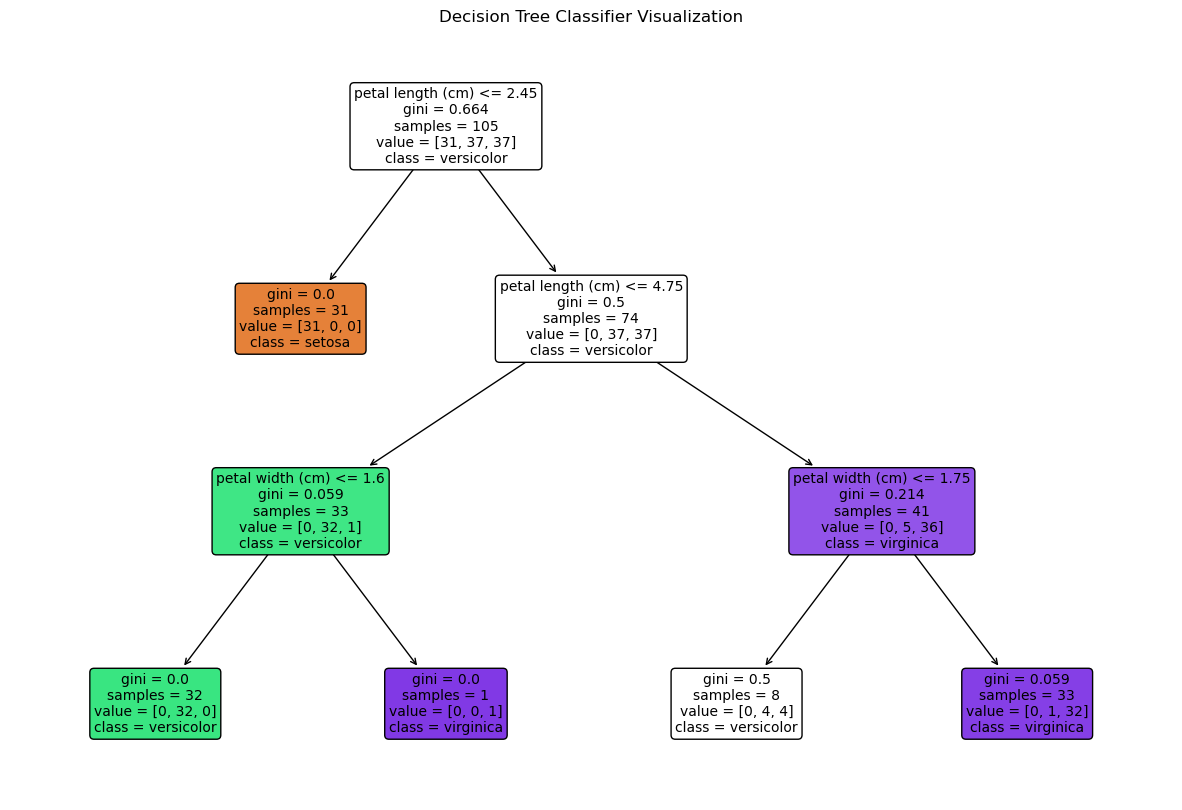

In [21]:
# CODE CELL 4: Visualization of the Decision Tree
# Note: Requires matplotlib for inline plotting.
plt.figure(figsize=(15, 10))
tree.plot_tree(
    dt_model, 
    feature_names=X.columns.tolist(),  # Names of the features
    class_names=iris.target_names.tolist(), # Names of the classes
    filled=True, 
    rounded=True, 
    fontsize=10
)
plt.title("Decision Tree Classifier Visualization")
plt.show()